# 探索的データ解析
---
予測する前に、データセットの現状を把握する

### 分析環境構築

In [25]:
# 分析に必要なライブラリをインポート
import pandas as pd
import numpy as np

### データセットを読み込む

In [26]:
# データセットを読み込む
# 読み込んだデータセットをdfという名前のデータフレームに代入する
df = pd.read_csv("../dataset/winequality-red.csv")

In [14]:
# データの先頭行を表示する
df.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


- 列ごとに表示されていないので、読み込み方を工夫する必要がある
- ;（セミコロン）で列に分割することができそうだ
- sep=';'を追記して、列に分割してみよう

In [27]:
# データセットを読み込む
df = pd.read_csv("../dataset/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


- データテーブルとして綺麗に列を分割して表示されている

## 列名の意味を調べる
---
- 下記のリンクをクリックすると、公開用のスプレッドシートに飛びます
- [スプレッドシートで翻訳関数を使ってみよう](https://docs.google.com/spreadsheets/d/1q2uugJ5_jtUcJeI8nHAX90Aa3TastjLwYW9NySmQ6ag/edit?usp=sharing)


### カラム名一覧

| 英語 | google翻訳 | 修正した日本語訳 |
|:-----------|------------:|:------------:|
|  fixed acidity | 固定酸度 | This |
| volatile acidity | 揮発性の酸味 | This |
|  citric acid | クエン酸 | This |
|  residual sugar | 残留糖 | This |
|  chlorides | 塩化物 | This |
|  free sulfur dioxide | 遊離二酸化硫黄 | This |
|  total sulfur dioxide | 総二酸化硫黄 | This |
|  density | 密度 | This |
|  pH | pH | This |
|  sulphates | 硫酸塩 | This |
| alcohol | アルコール | This |
| quality | 品質 | This |

## 集計

### データ量を把握する（shape）

In [17]:
df.shape

(1599, 12)

- およそ1600件のデータである
- 1599行, 12列のデータテーブル

### データ個数を調べる（count）

In [18]:
df.count()

fixed acidity           1599
volatile acidity        1599
citric acid             1599
residual sugar          1599
chlorides               1599
free sulfur dioxide     1599
total sulfur dioxide    1599
density                 1599
pH                      1599
sulphates               1599
alcohol                 1599
quality                 1599
dtype: int64

- 今回は欠損はなさそう
- 異常値が入っていないかは注意して進める

## 記述統計量（describe）

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


- 今回は、ワインの美味しさを「品質スコア」と定義する
- 「品質スコア」はデータテーブルでは、「quality」に格納されている
- 「quality」の最大値と最小値はそれぞれ<strong>8と3</strong>である
    - 一般的に最小値3, 最大値8の選択肢はなさそうだ
    - なので、0~10段階の選択肢があると推測する 
- 「quality」の平均値は<strong>約5.64</strong>である
    - 0〜10の10段階で、平均が5.6であるなら、「quality」の値は正しそうだ
- 「quality」の標準偏差は<strong>約0.81</strong>である
    - 後述

## データ型

In [23]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

- 64bitの浮動小数点数なので数値
- 数値データで構成されているため、モデルは作りやすいと予想できる

## 可視化

In [28]:
# 可視化ライブラリのインポート
import matplotlib.pyplot as plt
import seaborn as sns

### 度数分布

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

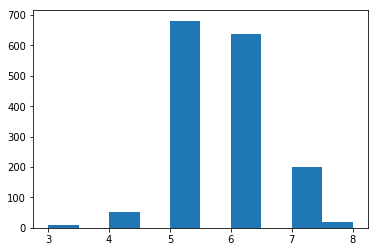

In [29]:
plt.hist(df['quality'], bins=10 )

### 標準化（平均0分散1）

In [39]:
# StandardScalerクラスによる標準化
from sklearn.preprocessing import StandardScaler

#インスタンス化
scaler = StandardScaler()
scaler.fit(df)
scaler.transform(df)
df_std = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [41]:
df_std.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,3.435512e-16,1.699704e-16,4.335355e-16,-1.905223e-16,4.838739e-16,1.432042e-16,1.289532e-16,2.336509e-14,3.002879e-15,7.639596e-16,9.437243e-16,-8.051373e-16
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945e+00,-1.422500e+00,-1.230584e+00,-3.538731e+00,-3.700401e+00,-1.936507e+00,-1.898919e+00,-3.265165e+00
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-3.712290e-01,-8.487156e-01,-7.440403e-01,-6.077557e-01,-6.551405e-01,-6.382196e-01,-8.663789e-01,-7.878226e-01
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-1.799455e-01,-1.793002e-01,-2.574968e-01,1.760083e-03,-7.212705e-03,-2.251281e-01,-2.093081e-01,4.508484e-01
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,5.384542e-02,4.901152e-01,4.723184e-01,5.768249e-01,5.759223e-01,4.240158e-01,6.354971e-01,4.508484e-01
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,1.112703e+01,5.367284e+00,7.375154e+00,3.680055e+00,4.528282e+00,7.918677e+00,4.202453e+00,2.928190e+00


(array([ 10.,   0.,  53., 681.,   0., 638.,   0., 199.,   0.,  18.]),
 array([-3.26516463, -2.64582913, -2.02649364, -1.40715814, -0.78782264,
        -0.16848714,  0.45084835,  1.07018385,  1.68951935,  2.30885485,
         2.92819035]),
 <a list of 10 Patch objects>)

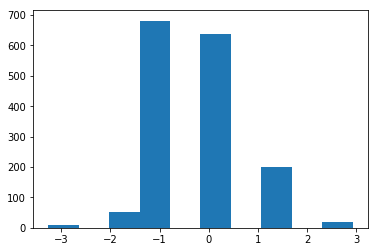

In [42]:
plt.hist(df_std.quality)

### 正規化（最大1, 最小0）

In [52]:
from sklearn import preprocessing
mmscaler = preprocessing.MinMaxScaler() # インスタンスの作成

mmscaler.fit(df)           # xの最大・最小を計算
y = mmscaler.transform(df) # xを変換
y.describe()

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [53]:
df0 = df.iloc[:,:-1]   # 毎回スライスするのはくどいので別の変数に代入しておきます。
df3 = (df0 - df0.mean()) / (df0.max() - df0.min())
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382
1,-0.045986,0.241219,-0.270976,0.004191,0.017585,0.128522,0.072552,0.003915,-0.087491,0.013085,-0.095844
2,-0.045986,0.159027,-0.230976,-0.016357,0.007568,-0.012323,0.026616,0.018599,-0.040247,-0.004880,-0.095844
3,0.254899,-0.169740,0.289024,-0.043754,-0.020812,0.015846,0.047817,0.092021,-0.118987,-0.046796,-0.095844
4,-0.081384,0.117931,-0.270976,-0.043754,-0.019143,-0.068661,-0.044056,0.077336,0.156604,-0.058772,-0.157382


In [56]:
df5 = df.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)
df5.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-1.570643e-14,-1.590973e-15,6.045057e-15,-1.344696e-15,5.098590e-15,-7.724347e-17,1.619856e-16,3.772732e-13,-5.937923e-15,-2.175036e-15,2.580411e-14,1.081756e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,-3.264143e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,-7.875763e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,4.507074e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,4.507074e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,2.927275e+00


In [58]:
"""
1. z-score normalization
以下の式で変換
x_new = (x - x_mean) / x_std
外れ値にもロバスト
"""
standardized_sample_df = (df - df.mean()) / df.std()
print(standardized_sample_df)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0         -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
1         -0.298454          1.966827    -1.391037        0.043403   0.223805   
2         -0.298454          1.296660    -1.185699       -0.169374   0.096323   
3          1.654339         -1.384011     1.483689       -0.453077  -0.264878   
4         -0.528194          0.961576    -1.391037       -0.453077  -0.243630   
5         -0.528194          0.738187    -1.391037       -0.524002  -0.264878   
6         -0.241019          0.403103    -1.083031       -0.665853  -0.392360   
7         -0.585629          0.682339    -1.391037       -0.949556  -0.477348   
8         -0.298454          0.291408    -1.288368       -0.382151  -0.307372   
9         -0.470759         -0.155370     0.457001        2.525799  -0.349866   
10        -0.930240          0.291408    -0.980362       -0.524002   0.202558   
11        -0.470759         

In [59]:
standardized_sample_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03
mean,-1.570643e-14,-1.590973e-15,6.045057e-15,-1.344696e-15,5.098590e-15,-7.724347e-17,1.619856e-16,3.772732e-13,-5.937923e-15,-2.175036e-15,2.580411e-14,1.081756e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.136377e+00,-2.277567e+00,-1.391037e+00,-1.162333e+00,-1.603443e+00,-1.422055e+00,-1.230199e+00,-3.537625e+00,-3.699244e+00,-1.935902e+00,-1.898325e+00,-3.264143e+00
25%,-7.004996e-01,-7.696903e-01,-9.290275e-01,-4.530767e-01,-3.711129e-01,-8.484502e-01,-7.438076e-01,-6.075656e-01,-6.549356e-01,-6.380200e-01,-8.661079e-01,-7.875763e-01
50%,-2.410190e-01,-4.367545e-02,-5.634264e-02,-2.402999e-01,-1.798892e-01,-1.792441e-01,-2.574163e-01,1.759533e-03,-7.210449e-03,-2.250577e-01,-2.092427e-01,4.507074e-01
75%,5.056370e-01,6.264921e-01,7.650078e-01,4.340257e-02,5.382858e-02,4.899619e-01,4.721707e-01,5.766445e-01,5.757422e-01,4.238832e-01,6.352984e-01,4.507074e-01
max,4.353787e+00,5.876138e+00,3.742403e+00,9.192806e+00,1.112355e+01,5.365606e+00,7.372847e+00,3.678904e+00,4.526866e+00,7.916200e+00,4.201138e+00,2.927275e+00


In [60]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [66]:
min_max_scaler = preprocessing.MinMaxScaler()
a_minmax = min_max_scaler.fit_transform(df)

print(a_minmax.max(axis=0)) # [1. 1. 1.]
print(a_minmax.min(axis=0)) # [0. 0. 0.]
print(a_minmax.mean(axis=0)) # [0.35185185 0.36206897 0.37096774]
print(a_minmax.var(axis=0)) # [0.10989941 0.10882767 0.1079566 ]


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.32917144 0.27932912 0.27097561 0.11224695 0.12598755 0.20950594
 0.14299573 0.49021139 0.44969543 0.19649631 0.31122817 0.5272045 ]
[0.02372559 0.01503205 0.03792375 0.00932001 0.00616988 0.02169142
 0.0135028  0.01918985 0.0147686  0.01029605 0.02686242 0.02607042]


In [69]:
df_a_minmax = pd.DataFrame(min_max_scaler.fit_transform(df))
df_a_minmax.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [70]:
df_a_minmax.describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,0.527205
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.161514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,0.400000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,0.600000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [73]:
plt.hist(df_a_minmax["quality"])

KeyError: 'quality'